# PARTE 29: REGRESIÓN LOGÍSTICA

## PARTE 29.1: TEORÍA DE REGRESIÓN LOGÍSTICA

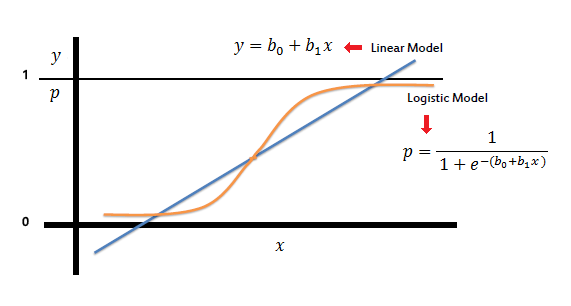

In [1]:
from IPython.display import Image
Image(filename="RECURSOS - CERTIFICACIÓN/REGRESIÓN LOGÍSTICA.png")

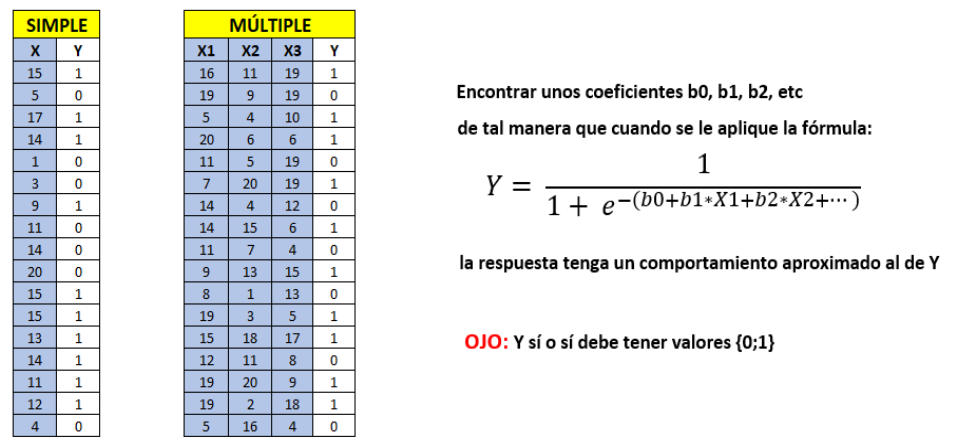

In [2]:
from IPython.display import Image
Image(filename="RECURSOS - CERTIFICACIÓN/REGRESIÓN LOGÍSTICA EXPLICADO.png")

## PARTE 29.2: ANÁLISIS DE DATASET

In [3]:
import pandas as pd
RUTA = "DATASETS - CERTIFICACIÓN/29_2_DIABETES.csv"
DATASET = pd.read_csv(RUTA)
DATASET.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#ANÁLISIS MEDIANTE DESCRIBE
DATASET.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


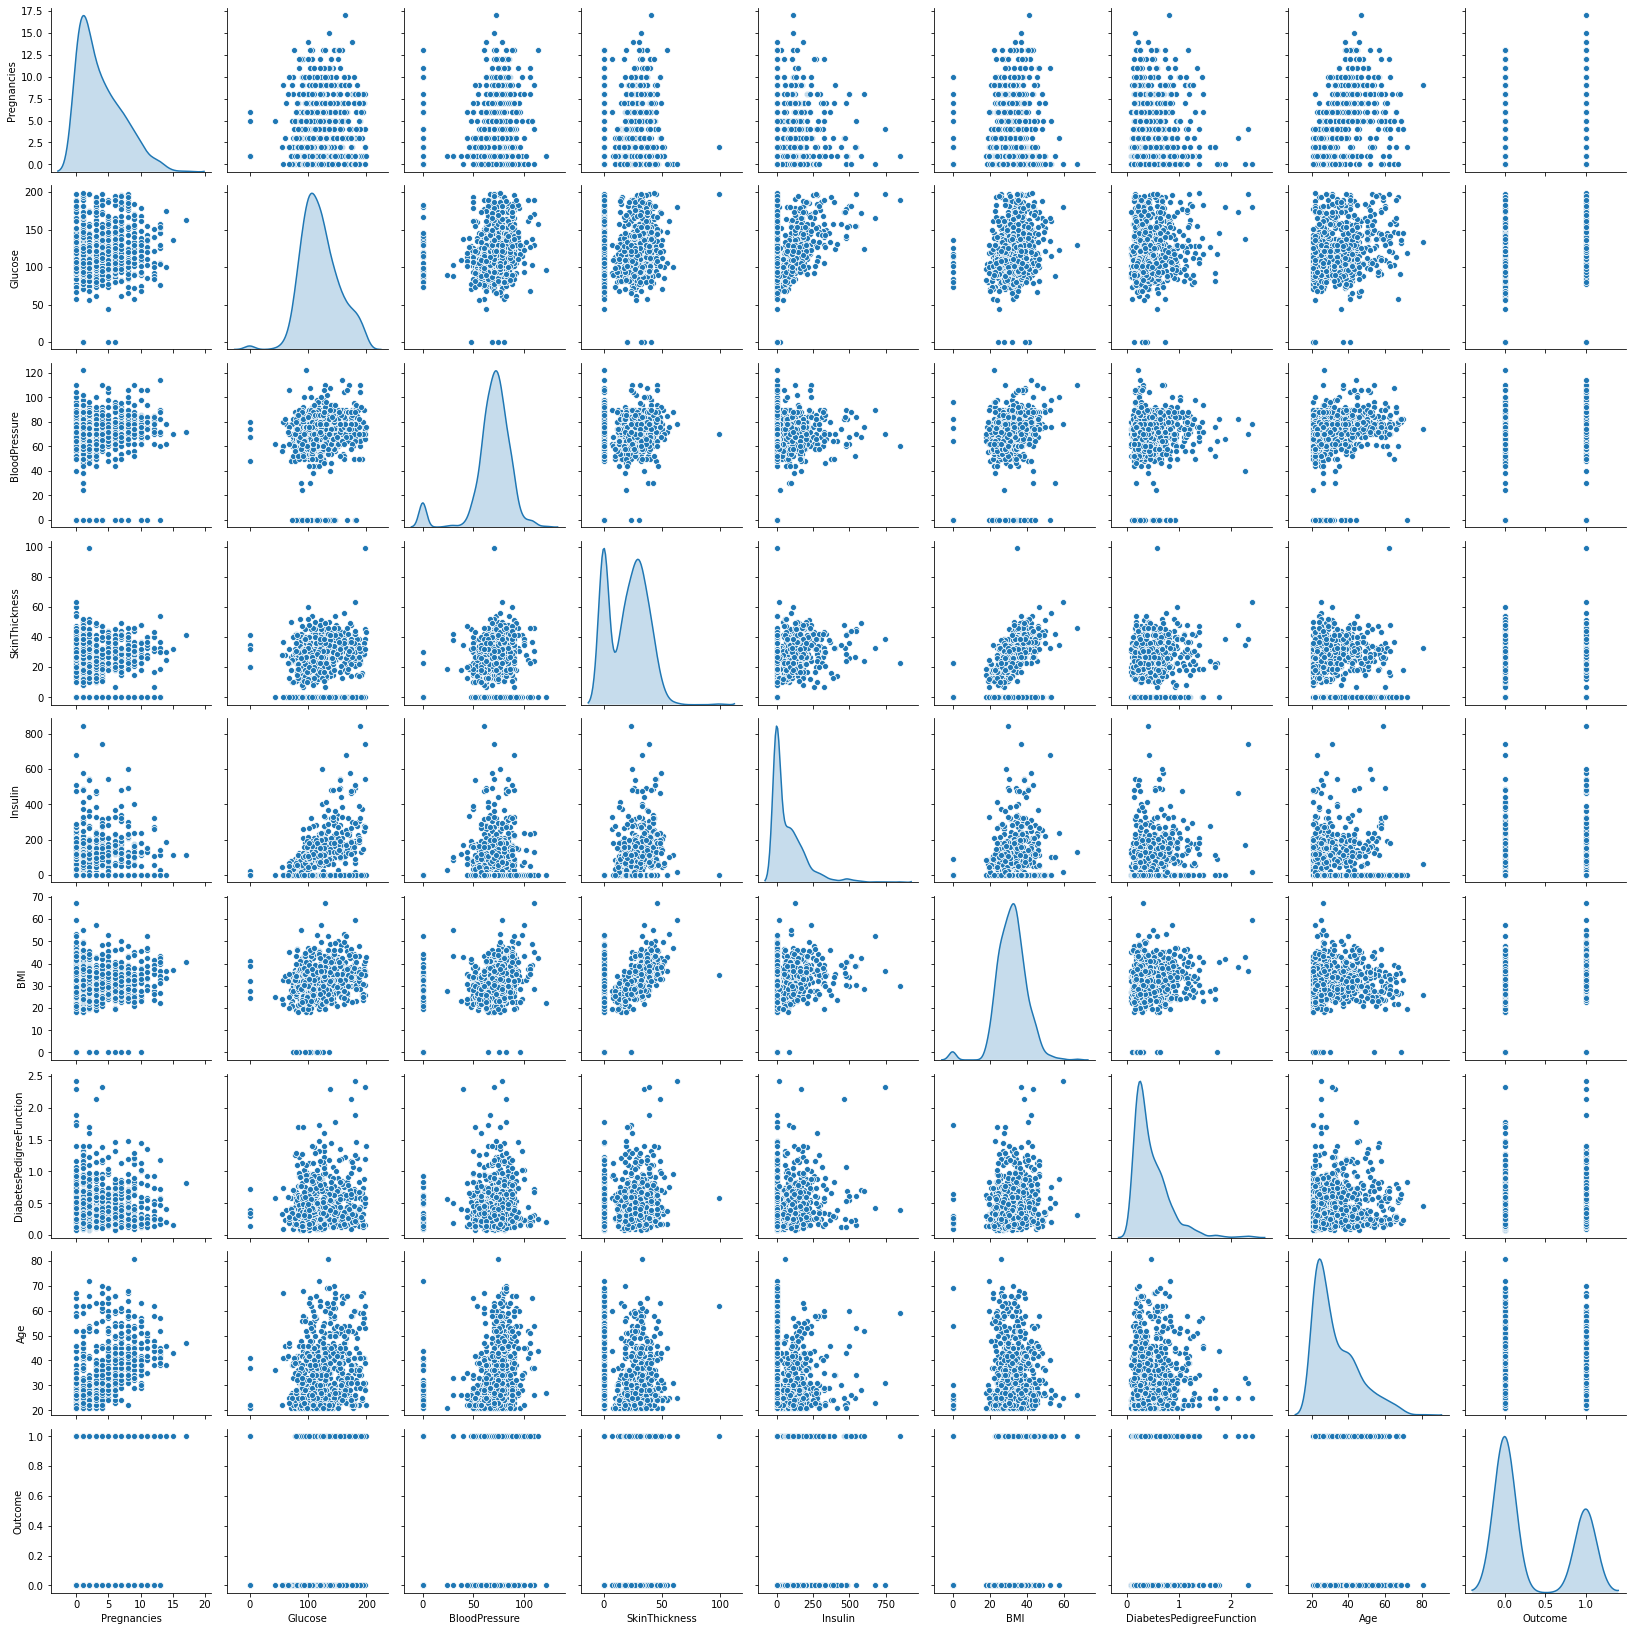

In [5]:
#ANÁLISIS MEDIANTE SEABORN
import seaborn as sns
sns.pairplot(DATASET,diag_kind = "kde")

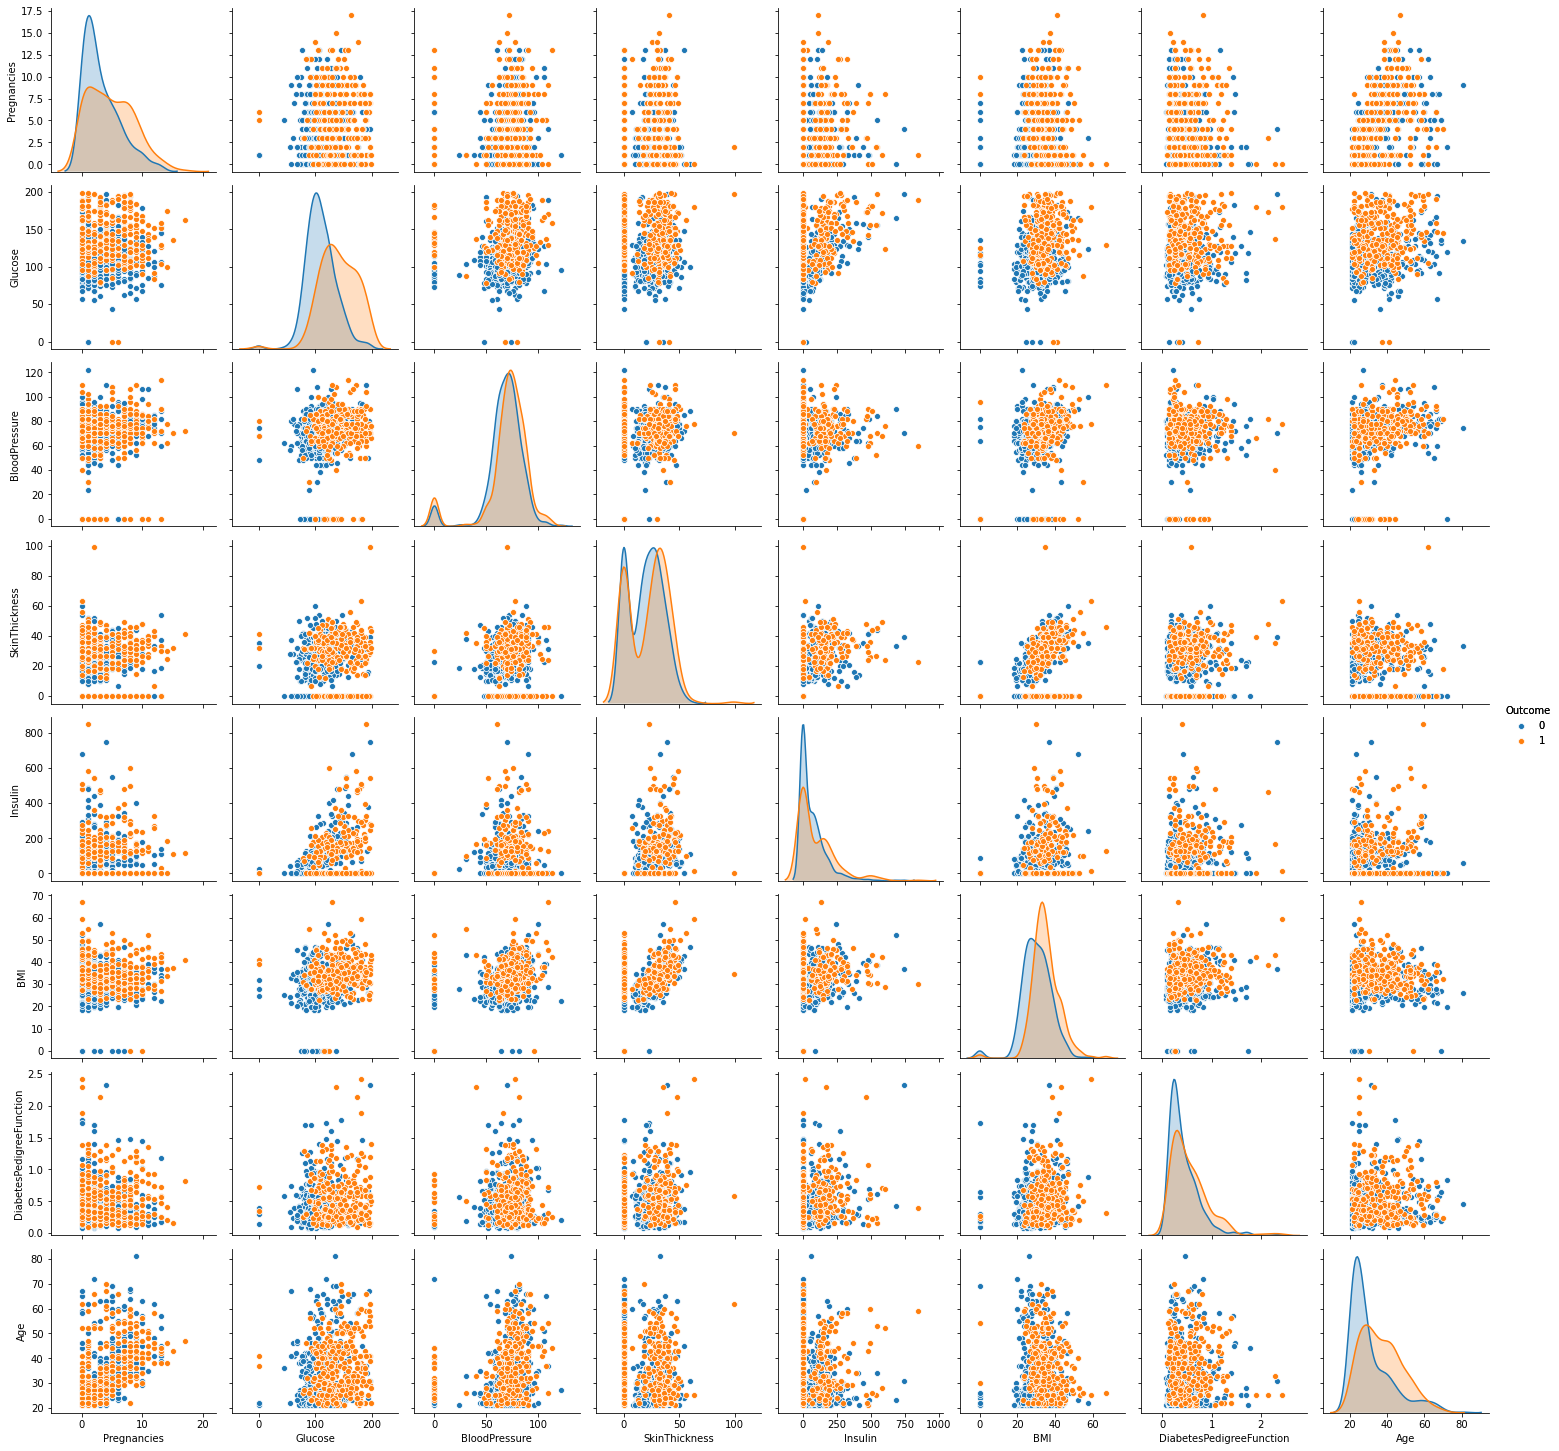

In [6]:
#ANÁLISIS MEDIANTE SEABORN
import seaborn as sns
sns.pairplot(DATASET,hue = "Outcome",diag_kind = "kde").add_legend()

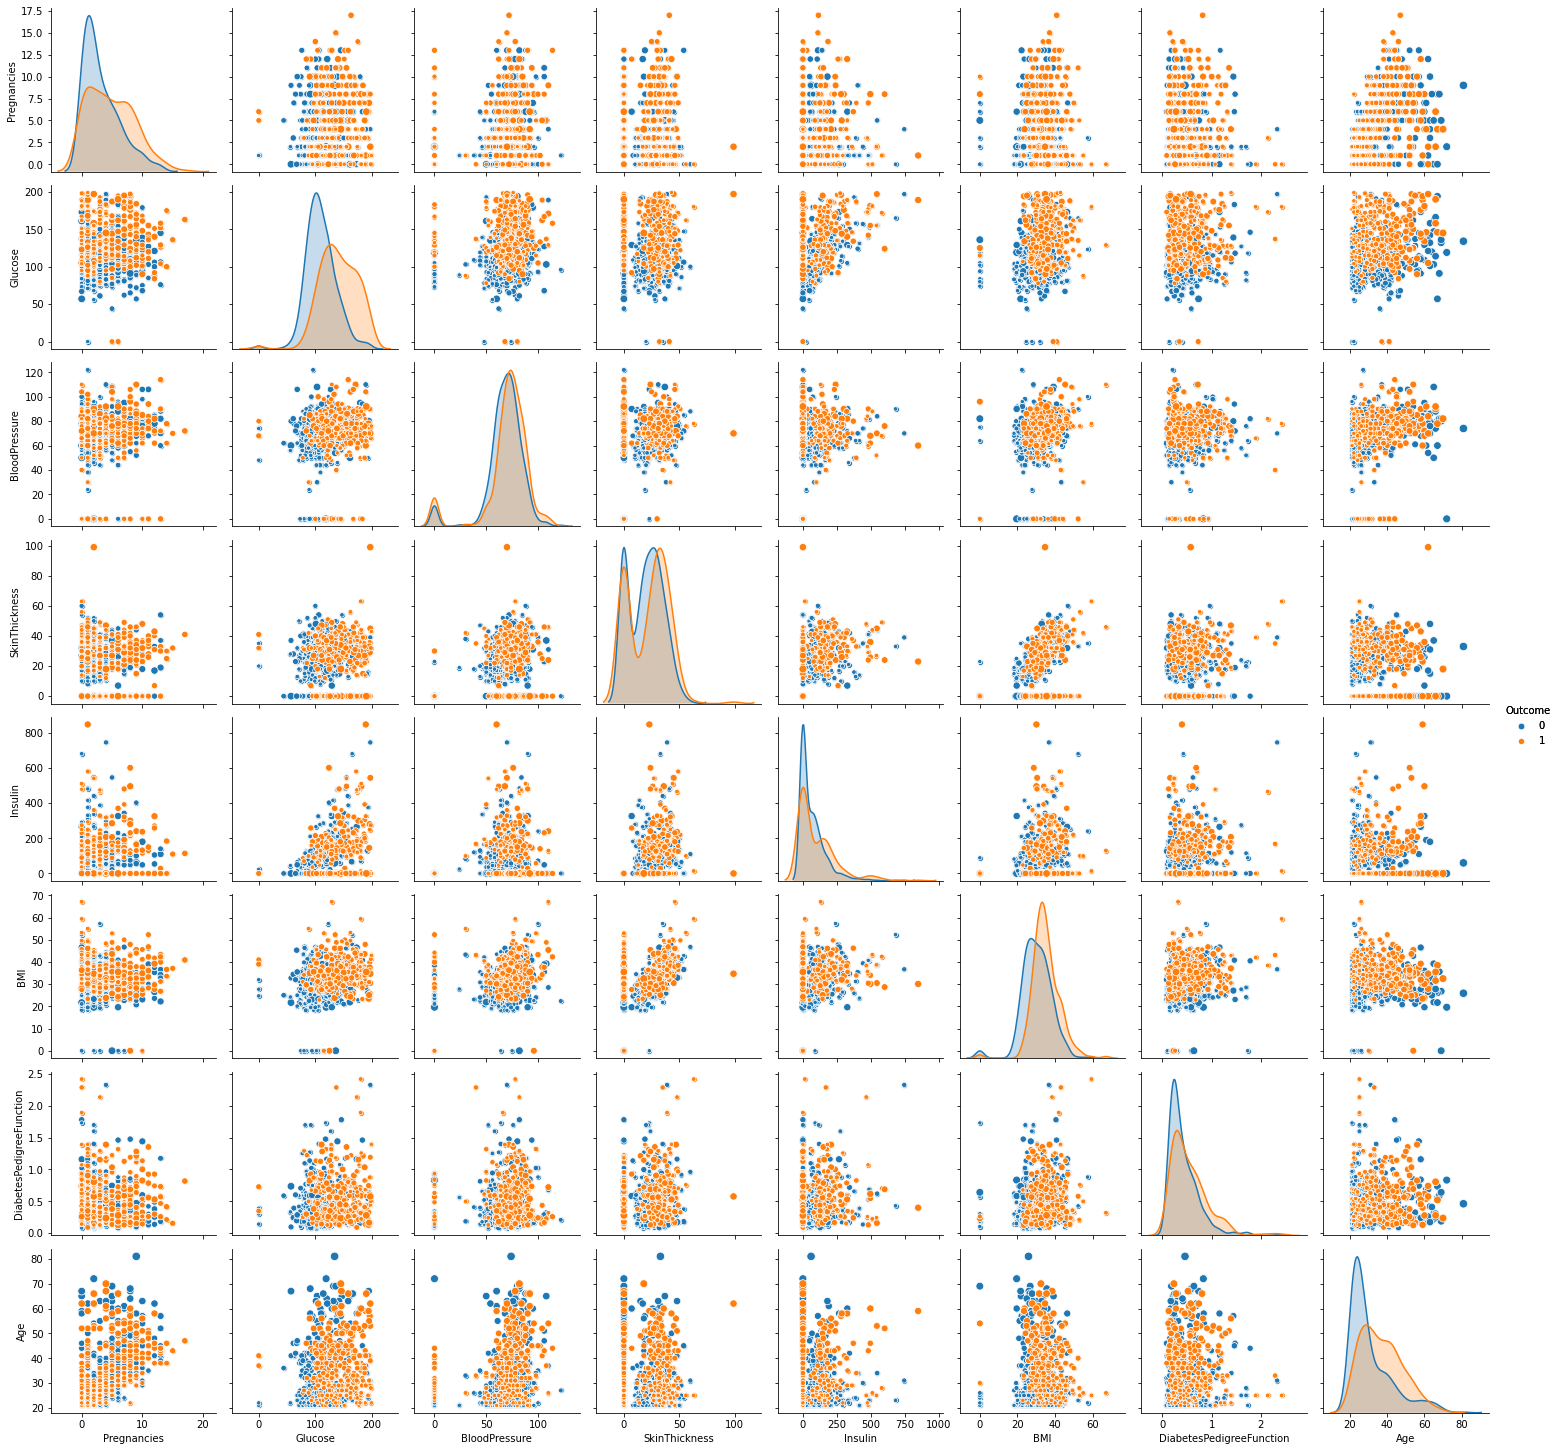

In [7]:
#ANÁLISIS MEDIANTE SEABORN
import seaborn as sns
sns.pairplot(DATASET,hue = "Outcome",diag_kind = "kde").map_offdiag(sns.scatterplot, size = DATASET["Age"]).add_legend()

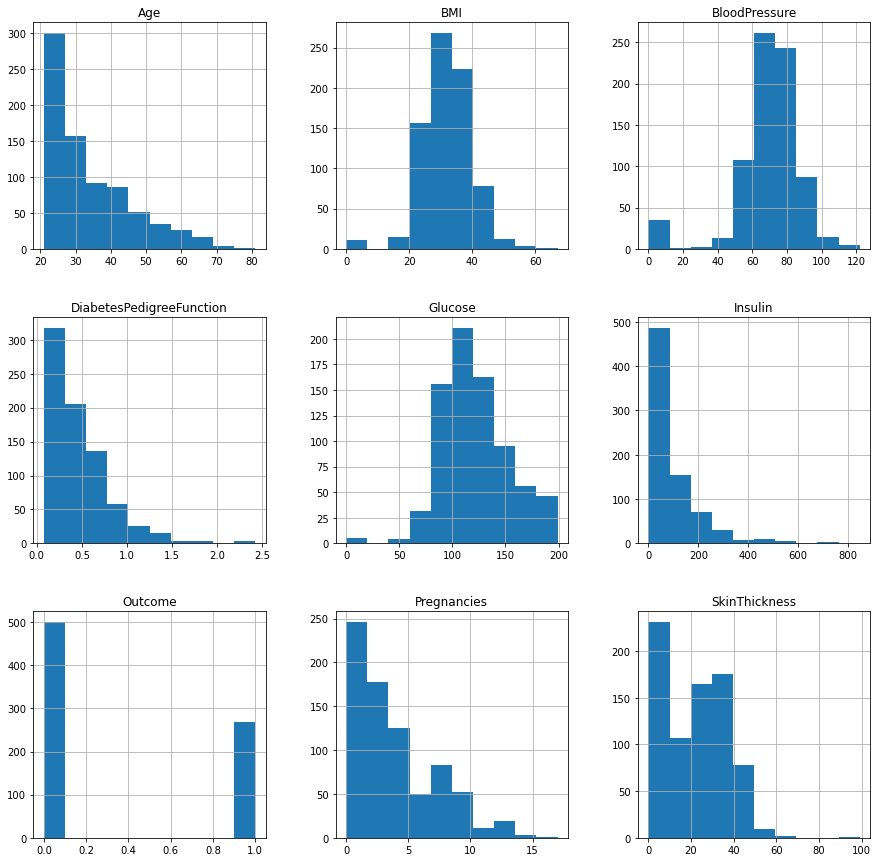

In [8]:
#ANÁLISIS MEDIANTE HISTOGRAMA
import matplotlib.pyplot as plt
DATASET.hist(figsize = (15,15))
plt.show()

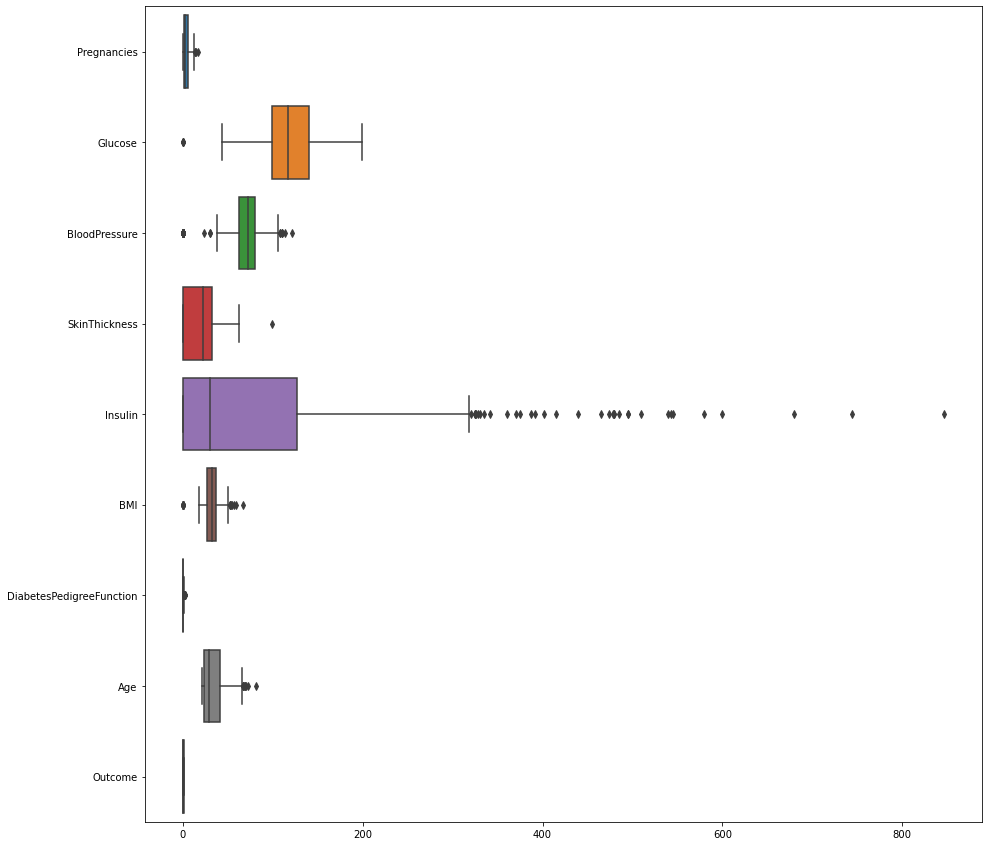

In [9]:
#ANÁLISIS MEDIANTE BOXPLOT
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (15,15))
sns.boxplot(data = DATASET,orient = "h")
plt.show()

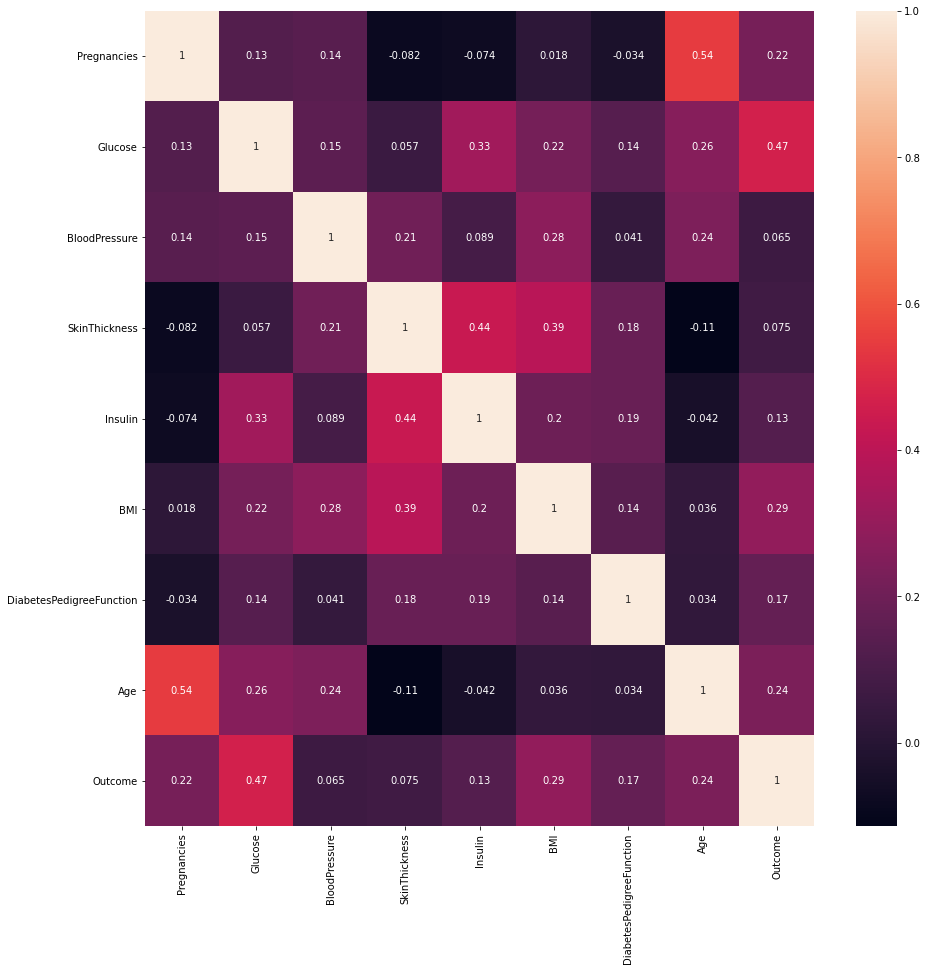

In [10]:
#ANÁLISIS MEDIANTE HEATMAP
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (15,15))
sns.heatmap(DATASET.corr(), annot = True)
plt.show()

## PARTE 29.3: GENERAR EL SELECTOR DEL MODELO

In [11]:
#PREPARACIÓN DE DATASET
import pandas as pd
RUTA = "DATASETS - CERTIFICACIÓN/29_2_DIABETES.csv"
DATASET = pd.read_csv(RUTA)

#GENERACIÓN DEL SELECTOR DEL MODELO
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

#VARIABLES PREDICHAS Y PREDICTORAS
VY = "Outcome"
VX = DATASET.columns.tolist()
VX.remove(VY)

#GENERACIÓN DE DATASET PREDICHO Y PREDICTOR
DATASET_Y = DATASET[VY].copy()
DATASET_X = DATASET[VX].copy()

#NORMALIZACIÓN DEL DATASET PREDICTOR
from sklearn.preprocessing import StandardScaler

NORMALIZAR = StandardScaler()
CABECERAS = DATASET_X.columns.tolist()
DATASET_X = NORMALIZAR.fit_transform(DATASET_X)
DATASET_X = pd.DataFrame(DATASET_X ,columns = CABECERAS)

#DEFINIR EL TIPO DE MODELO COMO LOGÍSTICO
from sklearn.linear_model import LogisticRegression
TIPO_MODELO = LogisticRegression()

#DEFINIR EL SELECTOR DE COLUMNAS RELEVANTES
SELECTOR = RFE(TIPO_MODELO, n_features_to_select = 1)
SELECTOR = SELECTOR.fit(DATASET_X , DATASET_Y)

#RANKING DE VARAIBLES
DATASET_RANKING = pd.DataFrame({
    "RANKING":list(SELECTOR.ranking_),
    "VARIABLE":VX
})

#RANKING ORDENADO
DATASET_ORDENADO = DATASET_RANKING.sort_values("RANKING").reset_index()
DATASET_ORDENADO = DATASET_ORDENADO.drop(["index"] , axis = 1)
DATASET_ORDENADO

,RANKING,VARIABLE
0,1,Glucose
1,2,BMI
2,3,Pregnancies
3,4,DiabetesPedigreeFunction
4,5,BloodPressure
5,6,Age
6,7,Insulin
7,8,SkinThickness


## PARTE 29.4: GENERAR MODELO LOGÍSTICO SKLEARN 

In [36]:
from sklearn.linear_model import LogisticRegression

MODELO_SKLEARN = LogisticRegression()
MODELO_SKLEARN.fit(DATASET_X, DATASET_Y)

#ALFAS Y BETAS
print("ALFAS -->",MODELO_SKLEARN.intercept_)
print("BETAS -->",MODELO_SKLEARN.coef_)

#SALIDA DEL MODELO
#[CERTEZA DEL VALOR][PROBABILIDAD]
PROBABILIDAD = MODELO_SKLEARN.predict_proba(DATASET_X)

#ESCOGIENDO EL LÍMITE PARA ANALIZAR PROBABILIDAD
#PROBABILIDAD < LÍMITE --> 0
#PROBABILIDAD >= LÍMITE --> 1
PROBABILIDAD = PROBABILIDAD[:,1]
LIMITE = 0.3194

import numpy as np
DATASET["PRED"] = np.where(PROBABILIDAD>LIMITE , 1 , 0)
DATASET

ALFAS --> [-0.85653603]
BETAS --> [[ 1.09400648  0.65908252  0.51019026  0.29817727 -0.22597779]]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,PRED
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,1
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,0
764,2,122,70,27,0,36.8,0.340,27,0,0
765,5,121,72,23,112,26.2,0.245,30,0,0
766,1,126,60,0,0,30.1,0.349,47,1,0


## PARTE 29.5: GENERAR MODELO LOGÍSTICO STATSMODELS

In [13]:
#GENERACIÓN DE MODELO STATSMODELS
import statsmodels.api as sa
MODELO_STATS = sa.Logit(DATASET_Y , DATASET_X).fit()
MODELO_STATS.pvalues

Optimization terminated successfully.
         Current function value: 0.530720
         Iterations 6


Pregnancies                 2.473327e-04
Glucose                     4.453883e-20
BloodPressure               1.317438e-02
SkinThickness               8.326096e-01
Insulin                     1.260985e-01
BMI                         5.601372e-08
DiabetesPedigreeFunction    7.750597e-04
Age                         2.582996e-01
dtype: float64

## PARTE 29.6: ANALIZAR MODELO LOGÍSTICO

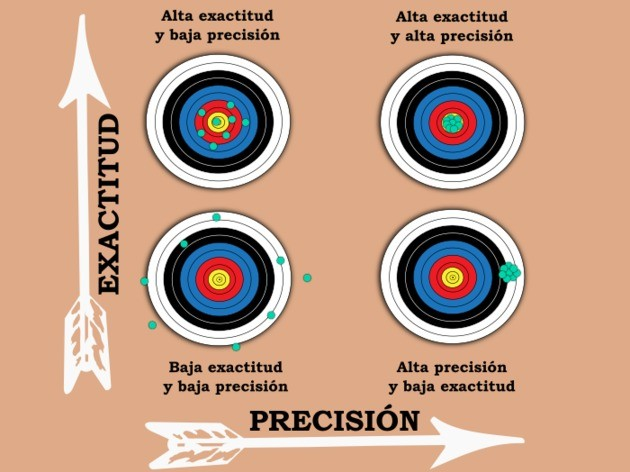

In [16]:
#CONCEPTO DE EXACTITUD Y PRECISIÓN
from IPython.display import Image
Image (filename="RECURSOS - CERTIFICACIÓN/EXACTO PRECISO.jpg")

In [2]:
#-----------------------------------------------------------------------------
#IMPORTACIÓN DE DATASET
import pandas as pd
RUTA = "DATASETS - CERTIFICACIÓN/29_2_DIABETES.csv"
DATASET = pd.read_csv(RUTA)

#-----------------------------------------------------------------------------
#GENERACIÓN DEL SELECTOR DEL MODELO
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

#VARIABLES PREDICHAS Y PREDICTORAS
VY = "Outcome"
VX = DATASET.columns.tolist()
VX.remove(VY)

#GENERACIÓN DE DATASET PREDICHO Y PREDICTOR
DATASET_Y = DATASET[VY].copy()
DATASET_X = DATASET[VX].copy()

#-----------------------------------------------------------------------------
#NORMALIZACIÓN DEL DATASET PREDICTOR
from sklearn.preprocessing import StandardScaler

NORMALIZAR = StandardScaler()
CABECERAS = DATASET_X.columns.tolist()
DATASET_X = NORMALIZAR.fit_transform(DATASET_X)
DATASET_X = pd.DataFrame(DATASET_X ,columns = CABECERAS)

#-----------------------------------------------------------------------------
#DEFINIR EL TIPO DE MODELO COMO LOGÍSTICO
from sklearn.linear_model import LogisticRegression
TIPO_MODELO = LogisticRegression()

#DEFINIR EL SELECTOR DE COLUMNAS RELEVANTES
SELECTOR = RFE(TIPO_MODELO, n_features_to_select = 1)
SELECTOR = SELECTOR.fit(DATASET_X , DATASET_Y)

#RANKING DE VARAIBLES
DATASET_RANKING = pd.DataFrame({
    "RANKING":list(SELECTOR.ranking_),
    "VARIABLE":VX
})

#RANKING ORDENADO
DATASET_ORDENADO = DATASET_RANKING.sort_values("RANKING").reset_index()
DATASET_ORDENADO = DATASET_ORDENADO.drop(["index"] , axis = 1)
DATASET_ORDENADO

,RANKING,VARIABLE
0,1,Glucose
1,2,BMI
2,3,Pregnancies
3,4,DiabetesPedigreeFunction
4,5,BloodPressure
5,6,Age
6,7,Insulin
7,8,SkinThickness


VARIABLES PREDICTORAS UTILIZADAS
['Glucose', 'BMI', 'Pregnancies', 'DiabetesPedigreeFunction', 'BloodPressure']
Optimization terminated successfully.
         Current function value: 0.533480
         Iterations 6
VN---> 378
VP---> 213
FN---> 55
FP---> 122
PRECISION--> 0.6358208955223881
EXACTITUD--> 0.76953125
SENSIBILIDAD--> 0.7947761194029851
ESPECIFICIDAD--> 0.756


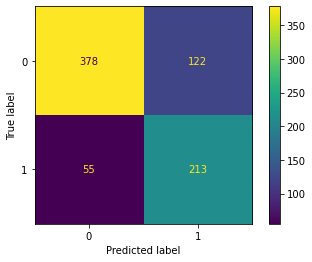

In [35]:
#-----------------------------------------------------------------------------
#DEFINICIÓN DE LA CANTIDA DE VARAIBLES DEL MODELO
NUM_VARIABLES = 5

#LÓGICA DE SELECCIÓN DE VARIABLES EN EL DATASET PREDICTOR
LISTA_VARIABLES = list(DATASET_ORDENADO["VARIABLE"])

LISTA_IGNORADAS = [
    "Age",
    "Insulin",
    "SkinThickness"
]

for VAR in LISTA_IGNORADAS:
    LISTA_VARIABLES.remove(VAR)

#-----------------------------------------------------------------------------    
#GENERACIÓN DE DATASET PREDICHO Y PREDICTOR
DATASET_Y = DATASET[VY].copy()
DATASET_X = DATASET[LISTA_VARIABLES[:NUM_VARIABLES]].copy()

print("VARIABLES PREDICTORAS UTILIZADAS")
print(LISTA_VARIABLES[:NUM_VARIABLES])

#-----------------------------------------------------------------------------
#NORMALIZACIÓN DEL DATASET PREDICTOR
from sklearn.preprocessing import StandardScaler

NORMALIZAR = StandardScaler()
CABECERAS = DATASET_X.columns.tolist()
DATASET_X = NORMALIZAR.fit_transform(DATASET_X)
DATASET_X = pd.DataFrame(DATASET_X ,columns = CABECERAS)

#-----------------------------------------------------------------------------
#GENERACIÓN DE MODELO SKLEARN
from sklearn.linear_model import LogisticRegression

MODELO_SKLEARN = LogisticRegression()
MODELO_SKLEARN.fit(DATASET_X, DATASET_Y)

#SALIDA DEL MODELO
#[CERTEZA DEL VALOR][PROBABILIDAD]
PROBABILIDAD = MODELO_SKLEARN.predict_proba(DATASET_X)

#ESCOGIENDO EL LÍMITE PARA ANALIZAR PROBABILIDAD
#PROBABILIDAD < LÍMITE --> 0
#PROBABILIDAD >= LÍMITE --> 1
PROBABILIDAD = PROBABILIDAD[:,1]
LIMITE = 0.3194

import numpy as np
DATASET["PRED"] = np.where(PROBABILIDAD>LIMITE , 1 , 0)

#-----------------------------------------------------------------------------
#GENERACIÓN DE MODELO STATSMODELS
import statsmodels.api as sa
MODELO_STATS = sa.Logit(DATASET_Y , DATASET_X).fit()

#CÁLCULO DE PVALUES
for INDICE,VALOR in enumerate(MODELO_STATS.pvalues):
    if VALOR > 0.05:
        print("----PVALUES CRÍTICOS----")
        print("{} --> {}".format(MODELO_STATS.pvalues.index[INDICE],VALOR))
        
#-----------------------------------------------------------------------------
#GENERACIÓN DE MATRIZ DE CONFUSIÓN
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

MATRIZ_CONFUSION = metrics.ConfusionMatrixDisplay (confusion_matrix = confusion_matrix(y_true = DATASET[VY],
                                                                                       y_pred = DATASET["PRED"] ))
MATRIZ_CONFUSION.plot()

#VALORES DE LA MATRIZ DE CONFUSIÓN
#[VN][FP]
#[FN][VP]

MATRIZ_CONFUSION_2 = confusion_matrix(y_true = DATASET[VY] , y_pred = DATASET["PRED"] )
#[FILAS][COLUMNAS]
VN = MATRIZ_CONFUSION_2[0][0]
VP = MATRIZ_CONFUSION_2[1][1]
FN = MATRIZ_CONFUSION_2[1][0]
FP = MATRIZ_CONFUSION_2[0][1]

print("VN--->",VN)
print("VP--->",VP)
print("FN--->",FN)
print("FP--->",FP)

#--------------------------------------------------------------------------------------
#PRECISIÓN
#El porcentaje de casos predichos correctamente como positivos del total de casos predichos como positivo
PRECISION = VP / (VP + FP)
print("PRECISION-->",PRECISION)

#EXACTITUD
#El porcentaje de casos predichos correctamente del total de casos
EXACTITUD = (VP + VN)/ (VP + FP + VN + FN)
print("EXACTITUD-->",EXACTITUD)

#SENSIBILIDAD ---> CAPACIDAD PARA DETECTAR POSITIVOS
#El porcentaje de casos predichos correctamente como positivos del total de casos que son positivos
SENSIBILIDAD = (VP)/ (VP + FN)
print("SENSIBILIDAD-->",SENSIBILIDAD)

#ESPECIFICIDAD ---> CAPACIDAD PARA DETECTAR NEGATIVOS
#El porcentaje de casos predichos correctamente como negativos del total de casos que son negativos
ESPECIFICIDAD = (VN)/ (VN + FP)
print("ESPECIFICIDAD-->",ESPECIFICIDAD)

In [ ]:
#LÍMITE 0.9
PRECISION--> 0.875
EXACTITUD--> 0.6744791666666666
SENSIBILIDAD--> 0.07835820895522388
ESPECIFICIDAD--> 0.994

In [ ]:
#LÍMITE 0.4
PRECISION--> 0.6765799256505576
EXACTITUD--> 0.7747395833333334
SENSIBILIDAD--> 0.6791044776119403
ESPECIFICIDAD--> 0.826

In [ ]:
#LÍMITE 0.1
PRECISION--> 0.416
EXACTITUD--> 0.5143229166666666
SENSIBILIDAD--> 0.9701492537313433
ESPECIFICIDAD--> 0.27

## PARTE 29.7: ANÁLISIS MEDIANTE CURVA ROC

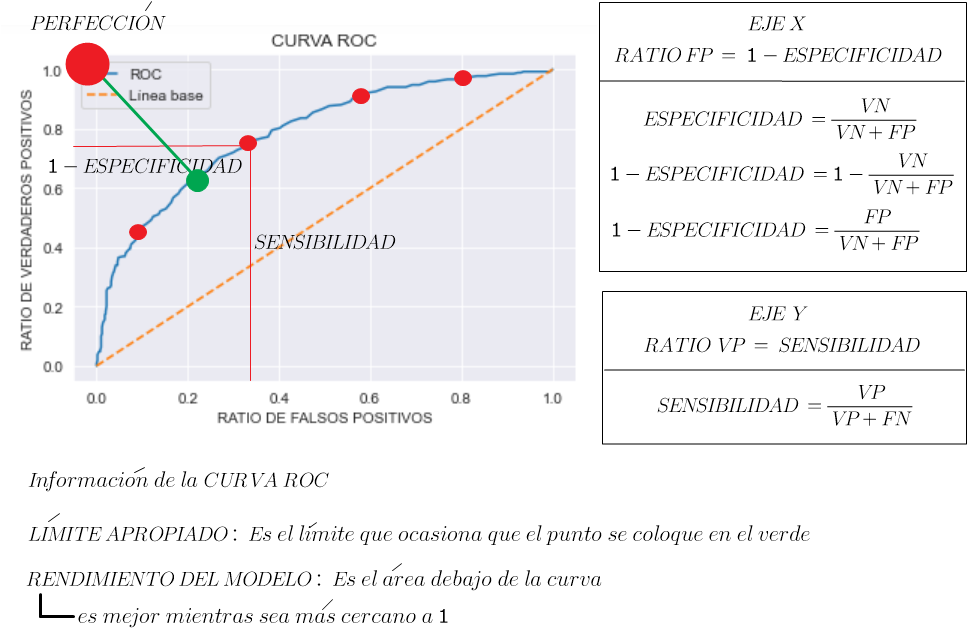

In [18]:
from IPython.display import Image
Image(filename="RECURSOS - CERTIFICACIÓN/CURVA_ROC.png")

#### GRAFICAR CURVA ROC (Receiver Operating Characteristic)

* EJE X --> 1-ESPECIFICIDAD --> RELACIÓN DE FP
* EJE Y --> SENSIBILIDAD --> RELACIÓN DE VP

ÁREA / RENDIMIENTO --> 0.837186567164179


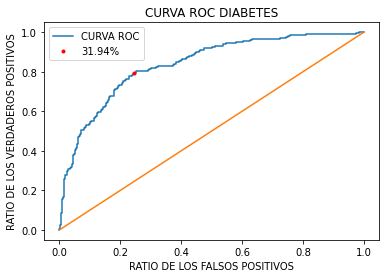

In [42]:
#CÁLCULO DE LAS PROBABILIDADES
from sklearn.linear_model import LogisticRegression

MODELO_SKLEARN = LogisticRegression()
MODELO_SKLEARN.fit(DATASET_X, DATASET_Y)
PROBABILIDAD = MODELO_SKLEARN.predict_proba(DATASET_X)
PROBABILIDAD = PROBABILIDAD[:,1]

#CÁLCULO DEL ÁREA DEBAJO DE LA CURVA ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

AREA = roc_auc_score(DATASET_Y,PROBABILIDAD)
print("ÁREA / RENDIMIENTO -->",AREA)

#GENERACIÓN DE LA CURVA ROC
import matplotlib.pyplot as plt
EJEX, EJEY, LIMITE = roc_curve(DATASET_Y,PROBABILIDAD)

#GENERACIÓN DE INFORMACIÓN ADICIONAL
DATASET_ROC = pd.DataFrame({
    "X":EJEX,
    "Y":EJEY,
    "L":LIMITE
})

DATASET_ROC["D"] = (DATASET_ROC["X"]**2 + (1-DATASET_ROC["Y"])**2)**(1/2)

import numpy as np
CX = DATASET_ROC[DATASET_ROC["D"] == np.min(DATASET_ROC["D"])]["X"]
CY = DATASET_ROC[DATASET_ROC["D"] == np.min(DATASET_ROC["D"])]["Y"]
LIMITE_OPTIMO = round(DATASET_ROC[DATASET_ROC["D"] == np.min(DATASET_ROC["D"])]["L"],4)
ETIQUETA = str(float(LIMITE_OPTIMO*100)) + "%"

plt.plot(EJEX,EJEY, label = "CURVA ROC")
plt.plot([0,1],[0,1])
plt.plot(CX,CY,"r.", label = ETIQUETA)
plt.title("CURVA ROC DIABETES")
plt.xlabel("RATIO DE LOS FALSOS POSITIVOS")
plt.ylabel("RATIO DE LOS VERDADEROS POSITIVOS")
plt.legend()
plt.show()

## PARTE 29.8: MODELO LOGÍSTICO FINAL

Optimization terminated successfully.
         Current function value: 0.533480
         Iterations 6
PRECISION--> 0.6358208955223881
EXACTITUD--> 0.76953125
SENSIBILIDAD--> 0.7947761194029851
ESPECIFICIDAD--> 0.756
ÁREA / RENDIMIENTO --> 0.837186567164179


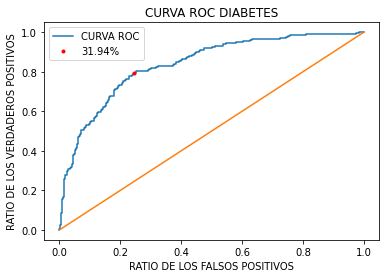

In [46]:
#-----------------------------------------------------------------------------
#IMPORTACIÓN DE DATASET
import pandas as pd
RUTA = "DATASETS - CERTIFICACIÓN/29_2_DIABETES.csv"
DATASET = pd.read_csv(RUTA)

#-----------------------------------------------------------------------------
#VARIABLES PREDICHAS Y PREDICTORAS
VY = "Outcome"
VX = ['Glucose', 'BMI', 'Pregnancies', 'DiabetesPedigreeFunction', 'BloodPressure']

#GENERACIÓN DE DATASET PREDICHO Y PREDICTOR
DATASET_Y = DATASET[VY].copy()
DATASET_X = DATASET[VX].copy()

#-----------------------------------------------------------------------------
#NORMALIZACIÓN DEL DATASET PREDICTOR
from sklearn.preprocessing import StandardScaler

NORMALIZAR = StandardScaler()
CABECERAS = DATASET_X.columns.tolist()
DATASET_X = NORMALIZAR.fit_transform(DATASET_X)
DATASET_X = pd.DataFrame(DATASET_X ,columns = CABECERAS)

#-----------------------------------------------------------------------------
#GENERACIÓN DE MODELO SKLEARN
from sklearn.linear_model import LogisticRegression

MODELO_SKLEARN = LogisticRegression()
MODELO_SKLEARN.fit(DATASET_X, DATASET_Y)

#SALIDA DEL MODELO
#[CERTEZA DEL VALOR][PROBABILIDAD]
PROBABILIDAD = MODELO_SKLEARN.predict_proba(DATASET_X)

#ESCOGIENDO EL LÍMITE PARA ANALIZAR PROBABILIDAD
#PROBABILIDAD < LÍMITE --> 0
#PROBABILIDAD >= LÍMITE --> 1
PROBABILIDAD = PROBABILIDAD[:,1]
LIMITE = 0.3194

import numpy as np
DATASET["PRED"] = np.where(PROBABILIDAD>LIMITE , 1 , 0)

#-----------------------------------------------------------------------------
#GENERACIÓN DE MODELO STATSMODELS
import statsmodels.api as sa
MODELO_STATS = sa.Logit(DATASET_Y , DATASET_X).fit()

#CÁLCULO DE PVALUES
for INDICE,VALOR in enumerate(MODELO_STATS.pvalues):
    if VALOR > 0.05:
        print("----PVALUES CRÍTICOS----")
        print("{} --> {}".format(MODELO_STATS.pvalues.index[INDICE],VALOR))
        
#-----------------------------------------------------------------------------
#GENERACIÓN DE MATRIZ DE CONFUSIÓN
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

#VALORES DE LA MATRIZ DE CONFUSIÓN
#[VN][FP]
#[FN][VP]

MATRIZ_CONFUSION_2 = confusion_matrix(y_true = DATASET[VY] , y_pred = DATASET["PRED"] )
#[FILAS][COLUMNAS]
VN = MATRIZ_CONFUSION_2[0][0]
VP = MATRIZ_CONFUSION_2[1][1]
FN = MATRIZ_CONFUSION_2[1][0]
FP = MATRIZ_CONFUSION_2[0][1]

#--------------------------------------------------------------------------------------
#PRECISIÓN
#El porcentaje de casos predichos correctamente como positivos del total de casos predichos como positivo
PRECISION = VP / (VP + FP)
print("PRECISION-->",PRECISION)

#EXACTITUD
#El porcentaje de casos predichos correctamente del total de casos
EXACTITUD = (VP + VN)/ (VP + FP + VN + FN)
print("EXACTITUD-->",EXACTITUD)

#SENSIBILIDAD ---> CAPACIDAD PARA DETECTAR POSITIVOS
#El porcentaje de casos predichos correctamente como positivos del total de casos que son positivos
SENSIBILIDAD = (VP)/ (VP + FN)
print("SENSIBILIDAD-->",SENSIBILIDAD)

#ESPECIFICIDAD ---> CAPACIDAD PARA DETECTAR NEGATIVOS
#El porcentaje de casos predichos correctamente como negativos del total de casos que son negativos
ESPECIFICIDAD = (VN)/ (VN + FP)
print("ESPECIFICIDAD-->",ESPECIFICIDAD)

#-----------------------------------------------------------------------------
#CÁLCULO DE LAS PROBABILIDADES
from sklearn.linear_model import LogisticRegression

MODELO_SKLEARN = LogisticRegression()
MODELO_SKLEARN.fit(DATASET_X, DATASET_Y)
PROBABILIDAD = MODELO_SKLEARN.predict_proba(DATASET_X)
PROBABILIDAD = PROBABILIDAD[:,1]

#-----------------------------------------------------------------------------
#CÁLCULO DEL ÁREA DEBAJO DE LA CURVA ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

AREA = roc_auc_score(DATASET_Y,PROBABILIDAD)
print("ÁREA / RENDIMIENTO -->",AREA)

#GENERACIÓN DE LA CURVA ROC
import matplotlib.pyplot as plt
EJEX, EJEY, LIMITE = roc_curve(DATASET_Y,PROBABILIDAD)

#GENERACIÓN DE INFORMACIÓN ADICIONAL
DATASET_ROC = pd.DataFrame({
    "X":EJEX,
    "Y":EJEY,
    "L":LIMITE
})

DATASET_ROC["D"] = (DATASET_ROC["X"]**2 + (1-DATASET_ROC["Y"])**2)**(1/2)

#-----------------------------------------------------------------------------
#GRÁFICO DE LA CURVA ROC
import numpy as np
CX = DATASET_ROC[DATASET_ROC["D"] == np.min(DATASET_ROC["D"])]["X"]
CY = DATASET_ROC[DATASET_ROC["D"] == np.min(DATASET_ROC["D"])]["Y"]
LIMITE_OPTIMO = round(DATASET_ROC[DATASET_ROC["D"] == np.min(DATASET_ROC["D"])]["L"],4)
ETIQUETA = str(float(LIMITE_OPTIMO*100)) + "%"

plt.plot(EJEX,EJEY, label = "CURVA ROC")
plt.plot([0,1],[0,1])
plt.plot(CX,CY,"r.", label = ETIQUETA)
plt.title("CURVA ROC DIABETES")
plt.xlabel("RATIO DE LOS FALSOS POSITIVOS")
plt.ylabel("RATIO DE LOS VERDADEROS POSITIVOS")
plt.legend()
plt.show()